## Iris Flower dataset

## AUTHOR: RUPESH KUMAR JHA

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
from collections import Counter
import sklearn.datasets as datasets
iris1=datasets.load_iris()
iris = pd.read_csv(r"F:\TSF\Iris.csv")

In [2]:
# how many data-points and features?
iris.shape

(150, 6)

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [6]:
#What are the column names in our dataset?
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [10]:
#How many data points for each class are present? 
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Iris is a balanced dataset as the number of data points for every class is 50.

In [11]:
print(type(iris['SepalLengthCm']))

<class 'pandas.core.series.Series'>


we have to convert 'pandas.core.series.Series' type to numeric data type as scatter work on numeric data type

In [12]:
iris['SepalLengthCm']=pd.to_numeric(iris['SepalLengthCm'])
iris['SepalWidthCm']=pd.to_numeric(iris['SepalWidthCm'])
iris['PetalLengthCm']=pd.to_numeric(iris['PetalLengthCm'])
iris['PetalWidthCm']=pd.to_numeric(iris['PetalWidthCm'])

# 2-D Scatter Plot

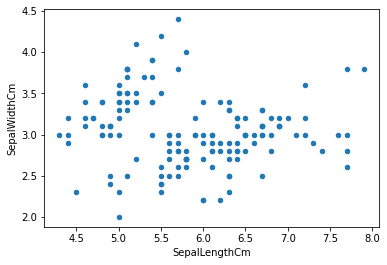

In [13]:
#2-D scatter plot:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()

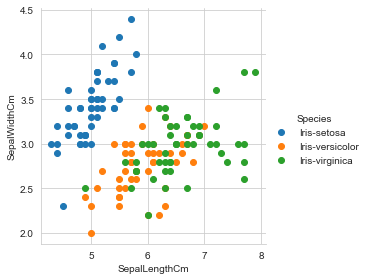

In [14]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")#use of themes
sns.FacetGrid(iris, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();


#Notice that the blue points can be easily seperated 
#from red and green by drawing a line. 
#But red and green data points cannot be easily seperated.
#Can we draw multiple 2-D scatter plots for each combination of features?
#How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

#  Pair-plot

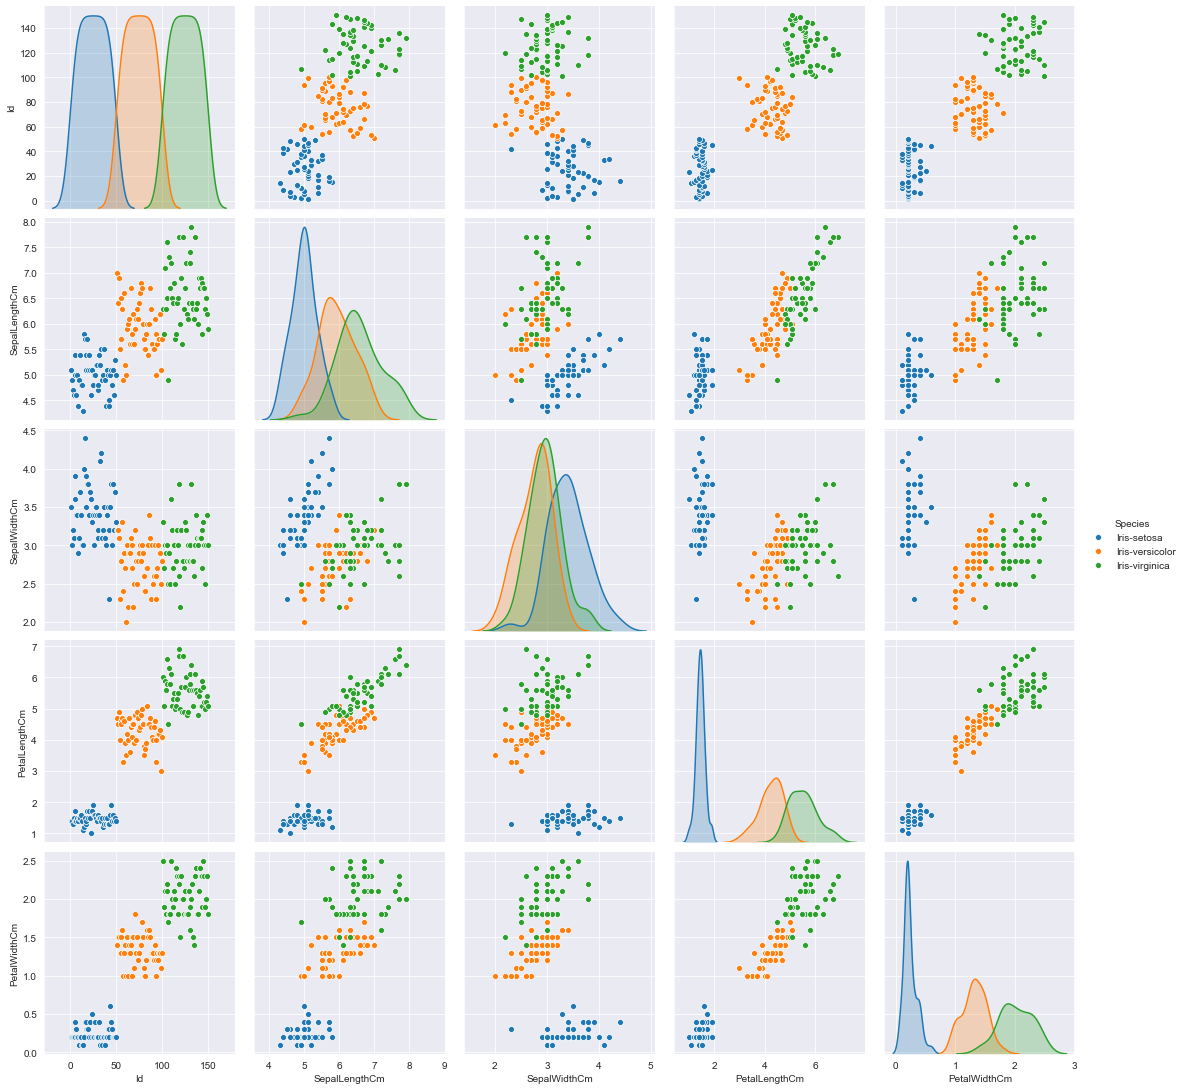

In [15]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("darkgrid")
sns.pairplot(iris, hue="Species", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# Box plot and Whiskers

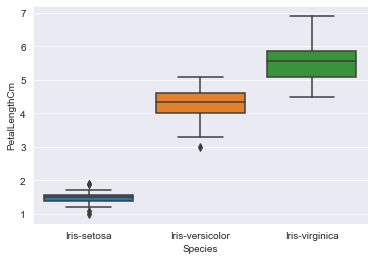

In [16]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='Species',y='PetalLengthCm', data=iris)
plt.show()

# Violin plots

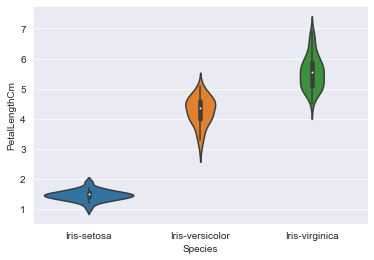

In [17]:
# Denser regions of the data are fatter, and sparser ones are thinner in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=8)
plt.show()

In [18]:
X=pd.DataFrame(iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
Y=iris["Species"]

## Splitting data into Train and cross validation(or test): Stratified Sampling

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,auc
from tqdm import tqdm

In [22]:
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier()
parameter={'max_depth':[1,2,3,4, 5, 10, 50],
           'min_samples_split':[5, 10, 50, 100, 500,100,1000],
           "min_samples_leaf": [20, 40, 100],
          "max_leaf_nodes": [2,5, 20],}
Gridcv=GridSearchCV(clf,parameter,cv=5)

In [23]:
Gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 50],
                         'max_leaf_nodes': [2, 5, 20],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [5, 10, 50, 100, 500, 100, 1000]})

In [24]:
print("R-Squared::{}".format(Gridcv.best_score_))
print("Best Hyperparameters::\n{}".format(Gridcv.best_params_))

R-Squared::0.9333333333333332
Best Hyperparameters::
{'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 5}


In [25]:
df = pd.DataFrame(data=Gridcv.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002195,0.000747,0.001595,0.000489,1,2,20,5,"{'max_depth': 1, 'max_leaf_nodes': 2, 'min_sam...",0.666667,0.666667,0.714286,0.714286,0.714286,0.695238,0.023328,37
1,0.001796,0.000399,0.001203,0.000396,1,2,20,10,"{'max_depth': 1, 'max_leaf_nodes': 2, 'min_sam...",0.666667,0.666667,0.714286,0.714286,0.714286,0.695238,0.023328,37
2,0.001795,0.000756,0.001397,0.000489,1,2,20,50,"{'max_depth': 1, 'max_leaf_nodes': 2, 'min_sam...",0.666667,0.666667,0.714286,0.714286,0.714286,0.695238,0.023328,37
3,0.001801,0.000401,0.001190,0.000385,1,2,20,100,"{'max_depth': 1, 'max_leaf_nodes': 2, 'min_sam...",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,127
4,0.001602,0.000494,0.000992,0.000013,1,2,20,500,"{'max_depth': 1, 'max_leaf_nodes': 2, 'min_sam...",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,127


In [26]:
Gridcv.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 5}

In [27]:
y_pred=Gridcv.predict(x_test)
model=DecisionTreeClassifier(max_depth=2,min_samples_split=5,min_samples_leaf=20,max_leaf_nodes=5)
model.fit(x_train,y_train)
model.predict(x_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9111111111111111


In [33]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris1.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found